# Linear Regression case study-1

In [19]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns

In [20]:
df = pd.read_csv('Advertising.csv')

In [21]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
df= df[['TV','Radio','Newspaper','Sales']]

In [23]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
def summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.mean(), x.median(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99), x.max()],
                    index =[ 'count', 'Null', 'mean', 'median', 'min', 'Q1', "Q5",'Q10', 'Q25', 'Q50', 'Q75', 'Q90','Q95', 'Q99', 'max' ])

df.apply(summary).T

,count,Null,mean,median,min,Q1,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q99,max
TV,200.0,0.0,147.0425,149.75,0.7,5.387,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.907,296.4
Radio,200.0,0.0,23.2640,22.90,0.0,0.399,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.400,49.6
Newspaper,200.0,0.0,30.5540,25.75,0.3,0.999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.515,114.0
Sales,200.0,0.0,14.0225,12.90,1.6,4.784,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.507,27.0


there is no null values

In [25]:
#remove outliers

df['TV']= df['TV'].clip_lower(df.TV.quantile(0.01))
df['TV']= df["TV"].clip_upper(df.TV.quantile(0.99))

df['Radio']= df['Radio'].clip_lower(df.Radio.quantile(0.01))
df['Radio']= df['Radio'].clip_upper(df.Radio.quantile(0.99))

df['Newspaper']= df['Newspaper'].clip_lower(df.Newspaper.quantile(0.01))
df['Newspaper']= df['Newspaper'].clip_upper(df.Newspaper.quantile(0.99))

df['Sales']= df['Sales'].clip_lower(df.Sales.quantile(0.01))
df['Sales']= df['Sales'].clip_upper(df.Sales.quantile(0.99))

In [26]:
df.apply(summary).T

,count,Null,mean,median,min,Q1,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q99,max
TV,200.0,0.0,147.05144,149.75,5.387,5.39987,13.195,24.88,74.375,149.75,218.825,261.44,280.735,292.90007,292.907
Radio,200.0,0.0,23.26549,22.90,0.399,0.39999,1.995,3.40,9.975,22.90,36.525,43.52,46.810,49.40000,49.400
Newspaper,200.0,0.0,30.37864,25.75,0.999,0.99999,3.600,5.99,12.750,25.75,45.100,59.07,71.825,89.40115,89.515
Sales,200.0,0.0,14.03541,12.90,4.784,4.79984,6.600,7.96,10.375,12.90,17.400,21.71,23.800,25.50007,25.507


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


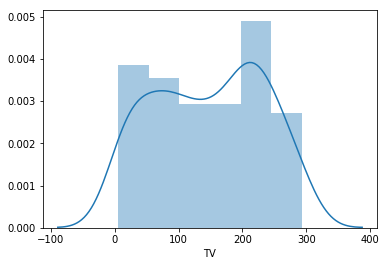

In [27]:
sns.distplot(df.TV)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


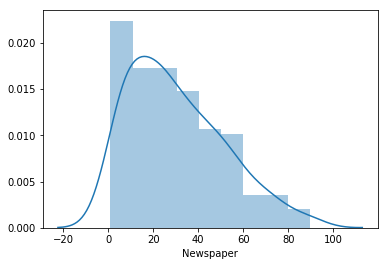

In [28]:
sns.distplot(df.Newspaper)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


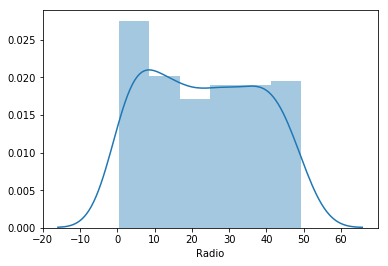

In [29]:
sns.distplot(df.Radio)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


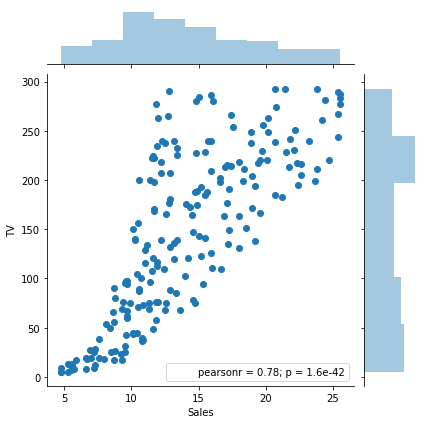

In [30]:
#Is there a relationship between sales and spend various advertising channels?

#Sales Vs. Newspaper advertisement spends

sns.jointplot(df.Sales, df.TV)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


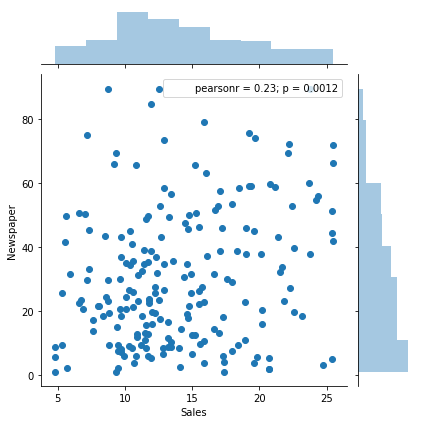

In [31]:
sns.jointplot(df.Sales, df.Newspaper)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


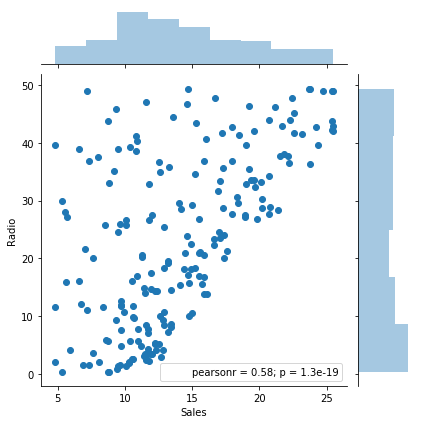

In [32]:
sns.jointplot(df.Sales, df.Radio)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


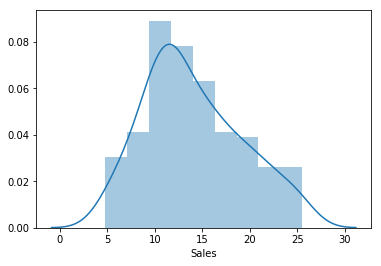

In [33]:
# Assumptions of linear regression model

# Dependant variable should follows normal distribution

sns.distplot(df.Sales)


C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


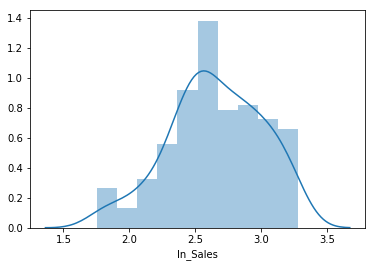

In [34]:
df['ln_Sales']= np.log(df['Sales']+1)
sns.distplot(df.ln_Sales)

In [35]:
#dropping the variable

df_model = df.drop(['Sales', 'ln_Sales'], axis = 1)

In [36]:
df_model.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [37]:
corr= df.corr()
corr

,TV,Radio,Newspaper,Sales,ln_Sales
TV,1.000000,0.054758,0.058259,0.782085,0.806580
Radio,0.054758,1.000000,0.356221,0.583285,0.522279
Newspaper,0.058259,0.356221,1.000000,0.227594,0.209332
Sales,0.782085,0.583285,0.227594,1.000000,0.978602
ln_Sales,0.806580,0.522279,0.209332,0.978602,1.000000


In [38]:
corr.to_csv('marketing.csv')

In [39]:
#check the multicolliniarity
df_model.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054758,0.058259
Radio,0.054758,1.000000,0.356221
Newspaper,0.058259,0.356221,1.000000


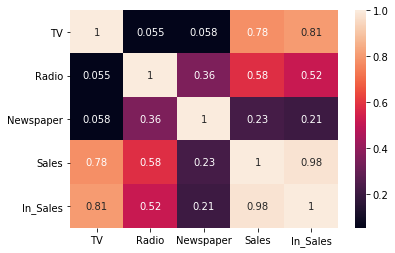

In [40]:
sns.heatmap(df.corr(), annot= True)

## Building Regression Model

In [41]:
import statsmodels.formula.api as smf

In [42]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales', 'ln_Sales'], dtype='object')

In [43]:
lm = smf.ols('Sales~TV', df).fit()

In [44]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     311.9
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           1.55e-42
Time:                        10:16:13   Log-Likelihood:                -516.22
No. Observations:                 200   AIC:                             1036.
Df Residuals:                     198   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1392      0.452     15.802      0.0

### Evaluating Model Accuracy

R-squared is a statistical measure of how close the data are to the fitted regression line.<br>
R-square signifies percentage of variations in the reponse variable that can be explained by the model.<br> 
R-squared = Explained variation / Total variation <br>
Total variation is variation of response variable around it's mean. <br>
R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. 

In [45]:
round(float(lm.rsquared), 2)

0.61

In [46]:
### MAKING PREDICTIONS
lmpredict = lm.predict( {'TV': df.TV } )

In [47]:
lmpredict[0:10]

0    17.930078
1     9.226130
2     7.945862
3    14.244031
4    15.618092
5     7.547244
6     9.835782
7    12.776178
8     7.542554
9    16.509121
dtype: float64

### Calculating mean square error ... RMSE
> RMSE calculate the difference between the actual value and predicted value of the response variable <br>
> The square root of the mean/average of the square of all of the error. <br> 
> Compared to the similar Mean Absolute Error, RMSE amplifies and severely punishes large errors. <br>
> The lesser the RMSE value, the better is the model.

In [60]:
from sklearn import metrics

In [61]:
mse_lm = metrics.mean_squared_error(df.Sales, lmpredict)

In [62]:
rmse_lm = np.sqrt(mse)
rmse_lm

1.6346476874322662

In [63]:
#Get the residuals and plot them
lm.resid[1:10]

1    1.173870
2    1.354138
3    4.255969
4   -2.718092
5   -0.347244
6    1.964218
7    0.423822
8   -2.742554
9   -5.909121
dtype: float64

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


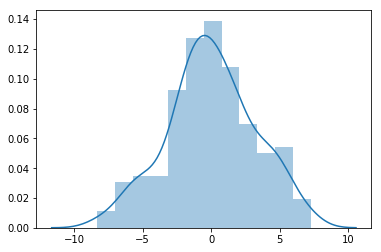

In [64]:
sns.distplot(lm.resid)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


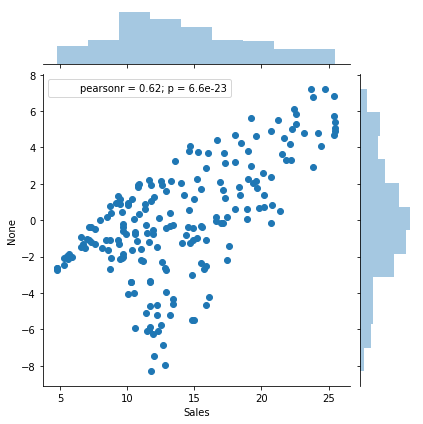

In [65]:
sns.jointplot(df.Sales, lm.resid)

In [66]:
sns.distplot(lm1.resid)

NameError: name 'lm1' is not defined

## Multiple Linear Regression Model

In [67]:
lm1 = smf.ols('Sales~TV+Radio+Newspaper', df).fit()

In [68]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     620.5
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          9.22e-100
Time:                        10:34:13   Log-Likelihood:                -375.70
No. Observations:                 200   AIC:                             759.4
Df Residuals:                     196   BIC:                             772.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0753      0.297     10.349      0.0

In [73]:
lmpredict1 = lm1.predict({'TV': df.TV, 'Radio': df.Radio, 'Newspaper': df.Newspaper} )
lmpredict1[0:10]

0    20.432760
1    12.400962
2    12.354139
3    17.574557
4    13.127957
5    12.523103
6    11.814417
7    12.178767
8     3.858196
9    12.531258
dtype: float64

In [74]:
round(float(lm1.rsquared), 2)

0.9

In [75]:
mse_lm1 = metrics.mean_squared_error(df.Sales, lmpredict1)

In [76]:
rmse_lm1 = np.sqrt(mse_lm1)
rmse_lm1

1.5834081353999512

In [77]:
lm1.params

Intercept    3.075337
TV           0.045141
Radio        0.189164
Newspaper   -0.002601
dtype: float64

In [78]:
lm1.pvalues

Intercept    2.649664e-20
TV           2.840498e-84
Radio        6.686398e-58
Newspaper    6.504159e-01
dtype: float64

The P-value of corresponding Newspaper variable is grater than 0.05,<br>
So, it is not significant variable, we should exclude that variable from the model

In [80]:
lm2 = smf.ols( 'Sales ~ TV + Radio', df ).fit()

In [81]:
lm2.params

Intercept    3.030591
TV           0.045116
Radio        0.187849
dtype: float64

In [82]:
lm2.pvalues

Intercept    9.456937e-22
TV           1.116859e-84
Radio        5.597599e-62
dtype: float64

In [83]:
predicted2 = lm2.predict( {'TV': df.TV, 'Radio':df.Radio } )

In [84]:
#Get the residuals and plot them
lm2.resid[1:10]

1   -2.020727
2   -3.128853
3    0.876126
4   -0.316394
5   -5.408910
6    0.013778
7    1.064587
8    0.986926
9   -1.933245
dtype: float64

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


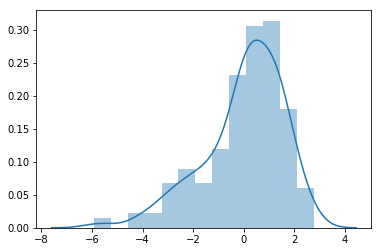

In [85]:
sns.distplot(lm2.resid)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


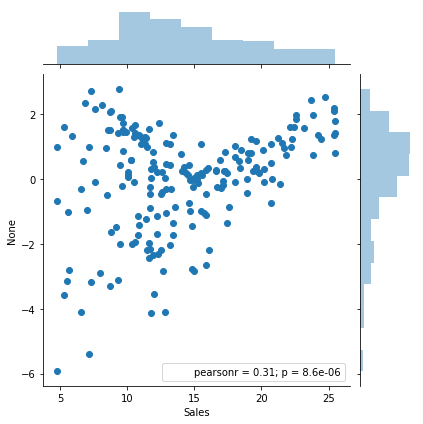

In [86]:
sns.jointplot(df.Sales, lm2.resid)

In [87]:
mse = metrics.mean_squared_error(df.Sales, predicted2)

In [88]:
rmse = np.sqrt(mse)
round(float(rmse), 2)

1.58

In [89]:
mae= metrics.mean_absolute_error(df.Sales, predicted2)
round(float(mae), 2)

1.22

## sklearn Library to build the model

In [ ]:
from sklearn.linear_model import LinearRegression

In [1]:
# Splitting into Train and test data sets
# Typically the model should be built on a training dataset and validated against a test dataset
# Let's split the dataset into 70/30 ratio. 70% belongs to training and 30% belongs to test.

from sklearn.cross_validation import train_test_split

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['TV', 'Radio', 'Newspaper']], df.Sales, test_size = 0.2, random_state = 34)

In [95]:
## Building the model with train set and make predictions on test set

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [96]:
y_pred

array([17.32892748,  6.83744454, 24.17497473,  5.16715456, 15.5494469 ,
       19.25997872, 10.78581101,  9.51728692,  7.6894349 , 18.51215627,
       10.44515059, 17.01163215,  4.24625986,  5.86957857, 14.9812462 ,
       17.90962449, 15.28824088, 17.58510541, 16.32898165, 16.38334022,
       10.30013589,  6.48163546, 11.74217317, 21.34550836,  8.69400526,
        9.55346107, 21.64391318,  7.99701253,  4.24487772, 18.42151736,
       15.21855976, 14.50836905,  7.71276436, 10.05464365, 15.43412012,
       11.74119668, 21.1938138 ,  9.37873155, 23.81085288,  4.2258398 ])

In [97]:
linreg.coef_

array([ 0.04625646,  0.19405604, -0.00267143])

In [98]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)

In [99]:
rmse = np.sqrt(mse)
round(float(rmse), 3)

1.743

In [100]:
y_pred_t= linreg.predict(X_train)

In [101]:
rmse= np.sqrt(metrics.mean_squared_error(y_train, y_pred_t))
round(float(rmse), 3)

1.55

In [107]:
round(float(metrics.r2_score(y_test, y_pred)*100), 3)

89.612

In [108]:
round(float(metrics.r2_score(y_train, y_pred_t)*100), 3)

90.584

In [111]:
list(zip(['TV', 'Radio', 'Newspaper'], list(linreg.coef_)))

[('TV', 0.04625645934876124),
 ('Radio', 0.19405604034429977),
 ('Newspaper', -0.002671434121167715)]

In [114]:
resid

74    -0.328927
10     1.762555
183    1.332025
195    2.432845
87     0.450553
142    0.840021
166   -2.785811
79     1.482713
129    2.010565
184   -0.912156
180    0.054849
64     0.988368
76     2.653740
189    0.830421
26     0.018754
169   -2.909624
97     0.211759
3      0.914895
40     0.271018
113   -0.483340
158   -3.000136
127    2.318365
75    -3.042173
55     2.354492
46     1.905995
145    0.746539
30    -0.243913
24     1.702987
91     3.055122
14     0.578483
146   -2.018560
81    -2.208369
65     1.587236
82     1.245356
131   -2.734120
134   -0.941197
69     1.106186
140    1.521268
198    1.689147
192    1.674160
Name: Sales, dtype: float64

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


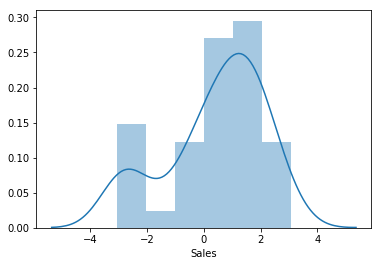

In [112]:
resid = y_test-y_pred
sns.distplot(resid)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


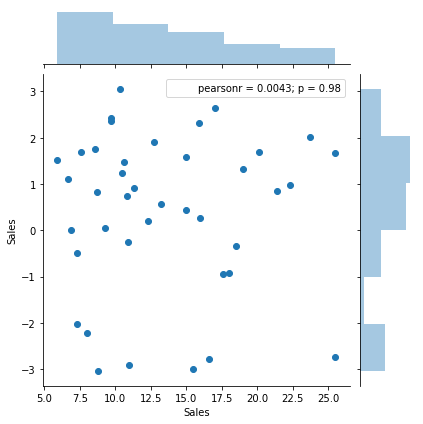

In [113]:
sns.jointplot(df.Sales, resid)

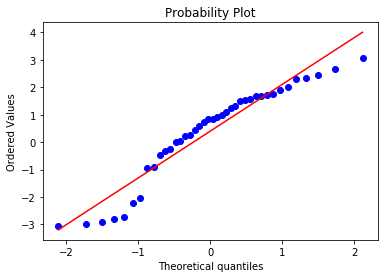

In [115]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( resid, dist="norm", plot=pylab )
pylab.show()

### K-FOLD CROSS VALIDATION

In [116]:
from sklearn.cross_validation import cross_val_score

In [117]:
linreg_k = LinearRegression()
cross_val_score(linreg_k, X_train, y_train, scoring = 'r2', cv = 10)


array([0.9285227 , 0.90729167, 0.89078177, 0.91364633, 0.92247194,
       0.92797109, 0.95236367, 0.89056785, 0.69527485, 0.73079447])

In [123]:
round(np.mean(cross_val_score(linreg_k, X_train, y_train, scoring = 'r2', cv = 10)*100), 2)

87.6

## Feature Selection based on importance

In [125]:
from sklearn.feature_selection import f_regression

In [126]:
F_values, P_values = f_regression(X_train, y_train)

In [127]:
F_values

array([232.79474459,  72.89558108,   6.16843353])

In [128]:
P_values

array([6.95905303e-33, 1.07314559e-14, 1.40487189e-02])

In [130]:
['%.3f'% p for p in P_values]

['0.000', '0.000', '0.014']